## Houses Prediction In ALGERIA  according the Area

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [5]:
df = pd.read_csv(r'C:\Users\Surface\Apple\Desktop\Data Analytics Portfolio\1- Python\HousePrice_Prediction.csv')
df

,Unnamed: 0,Area,Price
0,0,100,150000
1,1,150,210000
2,2,80,13000
3,3,60,7700
4,4,200,300000
5,5,210,340000
6,6,270,570000
7,7,300,700000
8,8,25,5000
9,9,10,3000


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Area,Price
0,100,150000
1,150,210000
2,80,13000
3,60,7700
4,200,300000
5,210,340000
6,270,570000
7,300,700000
8,25,5000
9,10,3000


### Visualize the data

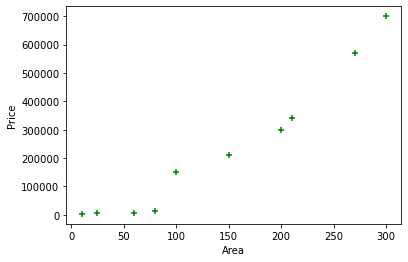

In [24]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')

plt.scatter(df.Area , df.Price , color = 'green',marker='+')


## Create LinearRegression Model 

In [11]:
reg = linear_model.LinearRegression()
reg.fit(df[['Area']],df.Price)

LinearRegression()

### Predict the price of the area we need (Area on square meters)

In [40]:
area = int(input('Area = '))
print('The price of a house with area=',area ,'is : ',reg.predict(np.array([area]).reshape(1, 1)))

Area = 500
The price of a house with area= 500 is :  [1083822.75041073]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Gradient & intercept of our Linear equation

In [17]:
print('Gradient = ',reg.coef_ ,'. intercept = ',reg.intercept_)

Gradient =  [2375.39012632] . intercept =  -103872.31274744793


### House price Plot with the linear eqution line(predictive line)

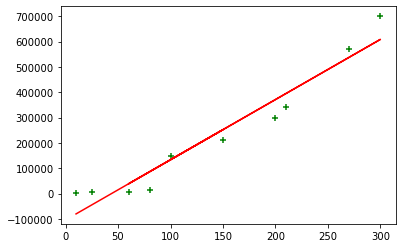

In [32]:
plt.scatter(df.Area , df.Price , color = 'green',marker='+')
plt.plot(df.Area , reg.predict(df[['Area']]), color = 'red')

# House Predition according to the area,age,bedrooms

In [33]:
data = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


## data processing

In [36]:
# fill the nan vulue with the mediane of the bedrooms
import math 
mediane = math.floor(data.bedrooms.median())
mediane

4

In [37]:
d = data.fillna(mediane)
d

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


## Linear Regression Model

In [38]:
re = linear_model.LinearRegression()
re.fit(d[['area','bedrooms','age']] , d.price)

LinearRegression()

### Predict the price 

In [45]:
area = int(input('Area = '))
bedrooms = int(input('Bedrooms = '))
age = int(input('Age = '))
print('\nPrice of a house with Area=',area,' and Bedrooms=',bedrooms,' and Age=',age,' \nPrice=',re.predict([[area,bedrooms,age]]))

Area = 5000
Bedrooms = 5
Age = 20

Price of a house with Area= 5000  and Bedrooms= 5  and Age= 20  
Price= [833945.25379311]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Gradient & Intercept

In [47]:
print('Gradient = ',re.coef_ ,'. intercept = ',re.intercept_)

Gradient =  [  112.06244194 23388.88007794 -3231.71790863] . intercept =  221323.00186540384


# Salary Prediction According to experience and test

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


## Data processing

In [51]:
ds = df.rename(columns ={'test_score(out of 10)' : 'test_score' ,'salary($)':'salary','interview_score(out of 10)':'interview_score' })


In [52]:

import math 
mediane = math.floor(ds.test_score.median())
ds.test_score= ds.test_score.fillna(mediane)
ds.experience = ds.experience.fillna('zero')
ds

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


#### Return words to numbers 

In [55]:
from word2number import w2n
ds.experience = ds.experience.apply(w2n.word_to_num)

ValueError: Type of input is not string! Please enter a valid number word (eg. 'two million twenty three thousand and forty nine')

In [56]:
ds.head(2)

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000


### LinearRegression Model

In [61]:
r = linear_model.LinearRegression()
r.fit(ds[['experience','test_score','interview_score']] , ds.salary)
r

LinearRegression()

#### Result

In [65]:
experience = int(input('experience = '))
test = int(input('test = '))
interview = int(input('interview = '))

print('\n\nSalary of employee with:\nexperience=',experience,' years\ntest score=',test,'/10\ninterview score=',interview,'/10\n\nIs Salary=',r.predict([[experience,test,interview]]),'$')

experience = 1
test = 7
interview = 10


Salary of employee with:
experience= 1  years
test score= 7 /10
interview score= 10 /10

Is Salary= [55522.56186317] $


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Bigmama Income Prediction

In [73]:
df = pd.read_csv(r'C:\Users\Surface\Apple\Desktop\Data Analytics Portfolio\1- Python\income.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df


,year,income
0,2010,3399.299037
1,2011,3768.297935
2,2012,4251.175484


### LinearRegression Model

In [77]:
income = linear_model.LinearRegression()
income.fit(df[['year']],df.income)

LinearRegression()

### Result 

In [79]:
year = int(input('year = '))
print('\nThe income of BigMama company in Year:',year,' is,\nIncome =',income.predict([[year]]),'$')

year = 2016

The income of BigMama company in Year: 2016  is,
Income = [5935.94860283] $


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Gradient= [425.9382235] 
Intercept= -852755.5099731664


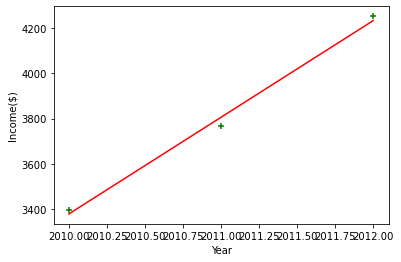

In [86]:
# Gradient and intercept 
print('Gradient=',income.coef_,'\nIntercept=',income.intercept_)

#Plot 

plt.xlabel('Year')
plt.ylabel('Income($)')
plt.scatter(df.year,df.income,color = 'green',marker='+')
plt.plot(df.year,income.predict(df[['year']]),color='red')